In [15]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Chargement des données

In [2]:
train_data = pd.read_csv('data/x_train.csv')  
y_data = pd.read_csv('data/y_train.csv')
test_data = pd.read_csv('data/x_test.csv')

In [3]:
def custom_weighted_rmse(y_true, y_pred):
    weights = np.where(y_true < 0.5, 1, 1.2)
    error_per_class = weights * (y_true - y_pred) ** 2
    mean_error = np.mean(error_per_class)
    return np.sqrt(mean_error)

custom_scorer = make_scorer(custom_weighted_rmse, greater_is_better=False)

In [31]:
def plot_feature_importances_tree(model, colonnes):
    n_features = len(colonnes)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), colonnes)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

## Data Preparation

In [ ]:
# Suppression de la colonne 'ID' (pas utile pour l'entraînement)
X = train_data.drop(columns=['ID'])
y = y_data.drop(columns=['ID'])

# Diviser les données en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard Scaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

### Polynomial features

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (162346, 13)
X_train_poly.shape: (162346, 105)


### KNN

In [5]:
knn = KNeighborsRegressor(n_neighbors=5)
# fit the model using the training data and training targets
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.01694298857372482
R² : 0.9900205647508412


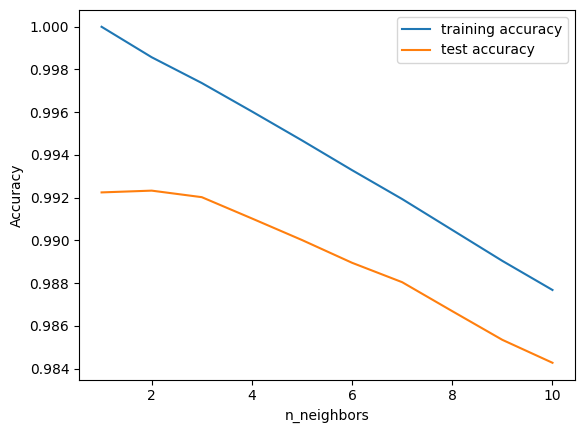

In [6]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_val_scaled, y_val))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

# print("lr.coef_: {}".format(lr.coef_))
# print("lr.intercept_: {}".format(lr.intercept_))

Custom RMSE : 0.17830360502760742
R² : 0.272863475556196
lr.coef_: [[-5.34607864e-03 -2.36044899e-01  6.06309678e-01 -7.87594305e-01
   3.78558008e-01 -9.79790301e-02  4.21636936e-01 -8.88831931e-01
   5.04716259e-01  1.92577437e-01 -3.06620126e-01 -2.06034644e-04
   5.74310730e-02]
 [ 2.67745142e-03  2.37269655e-01 -5.33767212e-01  5.67181617e-01
  -2.46270960e-01  1.00193670e-01 -3.20257220e-01  4.10329319e-01
  -1.89184624e-01 -1.67938326e-02  2.49563481e-02 -6.49558671e-03
  -5.07080629e-02]
 [-9.29589621e-03 -3.17887023e-01  8.26898774e-01 -4.65536240e-01
  -3.56102106e-02 -1.27448235e-01  4.84379891e-01 -5.49004315e-01
   2.12890724e-01  1.74917473e-01 -2.66955644e-01  1.10644202e-02
   2.18488296e-02]
 [-9.29589621e-03 -3.17887023e-01  8.26898774e-01 -4.65536240e-01
  -3.56102106e-02 -1.27448235e-01  4.84379891e-01 -5.49004315e-01
   2.12890724e-01  1.74917473e-01 -2.66955644e-01  1.10644202e-02
   2.18488296e-02]
 [-6.13834444e-03 -2.54770387e-01  6.52997538e-01 -3.96155709e-01

### Ridge

In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.17830481515343188
R² : 0.27286406830857274


In [9]:
ridge10 = Ridge(alpha=10).fit(X_train_scaled, y_train)
y_pred = ridge10.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.17832165198168187
R² : 0.2728176759719876


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train_scaled, y_train)
y_pred = ridge01.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.17830371901636466
R² : 0.27286359606641797


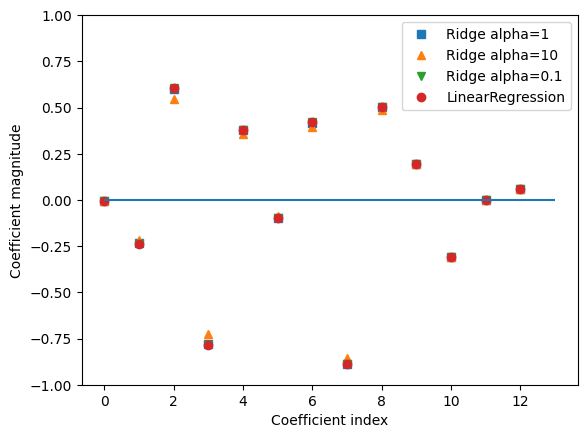

In [11]:
plt.plot(ridge.coef_[0], 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_[0], '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_[0], 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_[0], 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_[0]))
plt.ylim(-1, 1)
plt.legend()

### Lasso

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

c:\Users\bapdu\COMMUN\Dauphine\Identification-Gaz-Toxiques-BERTIN\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Custom RMSE : 0.21770203479067618
R² : 0.043444912788522486


In [13]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train_scaled, y_train)
y_pred = lasso001.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

c:\Users\bapdu\COMMUN\Dauphine\Identification-Gaz-Toxiques-BERTIN\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Custom RMSE : 0.18523995968123783
R² : 0.22184842433305887


In [14]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000).fit(X_train_scaled, y_train)
y_pred = lasso0001.predict(X_val_scaled)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

c:\Users\bapdu\COMMUN\Dauphine\Identification-Gaz-Toxiques-BERTIN\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+03, tolerance: 1.764e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\bapdu\COMMUN\Dauphine\Identification-Gaz-Toxiques-BERTIN\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.977e+02, tolerance: 7.463e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\bapdu\COMMUN\Dauphine\Identification-Gaz-Toxiques-BERTIN\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to inc

Custom RMSE : 0.17859696474892853
R² : 0.2709762385581595


Text(0, 0.5, 'Coefficient magnitude')

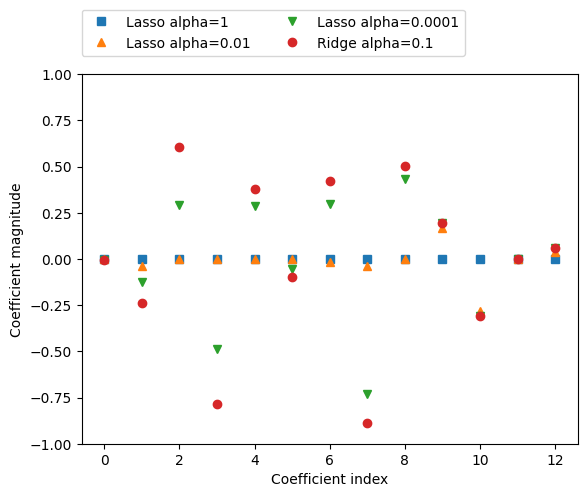

In [15]:
plt.plot(lasso.coef_[0], 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_[0], '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_[0], 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_[0], 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
rmse = custom_weighted_rmse(y_val, y_pred)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.01467039557192988
R² : 0.9930001277802529


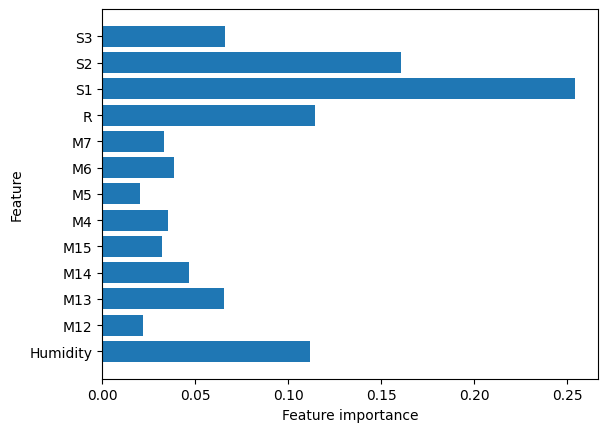

In [ ]:
plot_feature_importances_tree(tree, X_train.columns)

### Random Forest

In [17]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=7, min_samples_split=0.01, min_samples_leaf=30, random_state=42)
model_rf.fit(X_train_poly, y_train)
y_pred = model_rf.predict(X_val_poly)
rmse = custom_weighted_rmse(y_val, y_pred)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.11783819812374811
R² : 0.6115224949885704


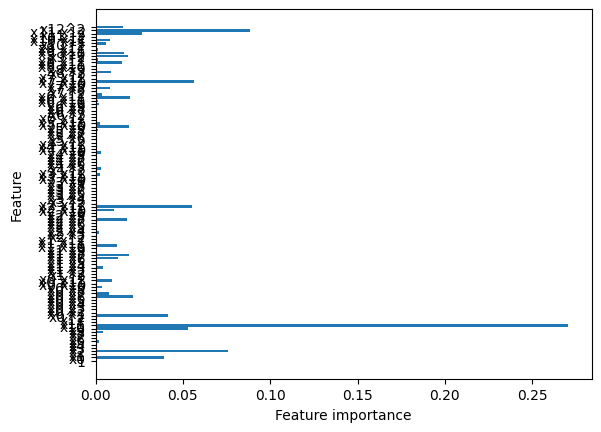

In [32]:
plot_feature_importances_tree(model_rf, list(poly.get_feature_names_out()))

### Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=15, max_depth=7, random_state=42)
multi_target_gbrt = MultiOutputRegressor(gbrt)
multi_target_gbrt.fit(X_train, y_train)
y_pred = multi_target_gbrt.predict(X_val)

custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.08305478702833727
R² : 0.879668392579379


### XGBoost

In [6]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
rmse = custom_weighted_rmse(y_val, y_pred)
custom_rmse = custom_weighted_rmse(y_val, y_pred)
r2 = r2_score(y_val, y_pred) 
print(f"Custom RMSE : {custom_rmse}")
print(f"R² : {r2}")

Custom RMSE : 0.022887290754751967
R² : 0.9473581910133362


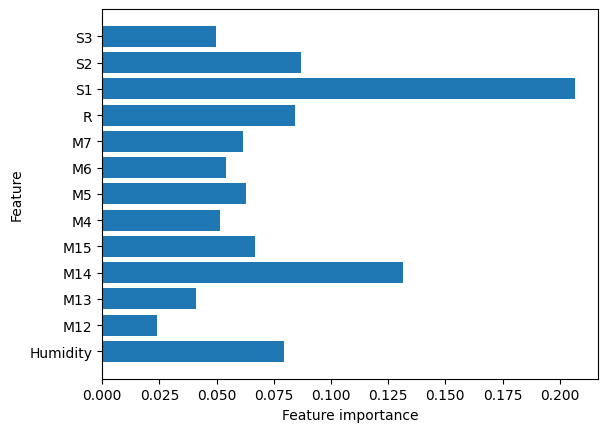

In [7]:
plot_feature_importances_tree(xgb, X_train)

## Test

In [21]:
# 6. Prédictions finales (sur test_data, si disponible)
X_test = test_data.drop(columns=['ID'])
X_test_scaled   = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

In [22]:
test_pred = model_rf.predict(X_test_poly)
output = pd.DataFrame(test_pred, columns=[f'c{i}' for i in range(1, 24)])
# Ajouter la colonne "ID" au début
output.insert(0, 'ID', test_data['ID'])
output.to_csv('predictions/predictions_RandomForestPolynomialFeatures.csv', index=False)